# Solving a fisheries optimization in Python

This notebook will introduce you both to a classical Optimal Control problem defined for a fishery but also will show you how to use GEKKO, an open-source dynamic optimization toolkit.

Unlike if you have taken my big-data course, this will be run primarily through an online, cloud-hosted Docker image. You don't need to know what this means other than to (hopefully) appreciate that the only software you will require is Chrome (or a modern equivilent).

## Import required packages

These lines will import the packages into python. On the line import numpy as np, the np is just a shortened version of the name that we will assign the package to so we don't have to write out numpy each time. Same for plt.

In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt


Next we will create the GEKKO model and save it as the variable m. Python is an "object oriented programming language". Understanding this fully is outside the domain of this course, but for our purposes here, just know that when we called GEKKO(), it created a big, complex object and saved it in m. We will use this object below to store input parameters and it will also give us the key functions (called "methods" when they are attached to an object) we need to run the optimization.

In [3]:
m = GEKKO()
print('Printing out the object, which will tell us how it wants to be expressed:')
print(m)

Printing out the object, which will tell us how it wants to be expressed:


Now that the object is created, we can set it's attributes, which are denoted via a "dot", as in m.attrbute. We will also be setting the key constants for our model (refer to lecture notes).

In [4]:
# time points
n=501
m.time = np.linspace(0,10,n)

# constants
p = 1 # A price index
c = 17.5 # Cost
r = 0.71 # Intrinsic growth rate (from logistic function)
k = 80.5 # Carrying capacity
Y_max = 20 # Maximum effort one could expend
q = 1 # An index of fishing "effort" per the Shaeffer model design.

print('Time attribute: ' + str(m.time))

Time attribute: [ 0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22
  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46
  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7
  0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94
  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1   1.12  1.14  1.16  1.18
  1.2   1.22  1.24  1.26  1.28  1.3   1.32  1.34  1.36  1.38  1.4   1.42
  1.44  1.46  1.48  1.5   1.52  1.54  1.56  1.58  1.6   1.62  1.64  1.66
  1.68  1.7   1.72  1.74  1.76  1.78  1.8   1.82  1.84  1.86  1.88  1.9
  1.92  1.94  1.96  1.98  2.    2.02  2.04  2.06  2.08  2.1   2.12  2.14
  2.16  2.18  2.2   2.22  2.24  2.26  2.28  2.3   2.32  2.34  2.36  2.38
  2.4   2.42  2.44  2.46  2.48  2.5   2.52  2.54  2.56  2.58  2.6   2.62
  2.64  2.66  2.68  2.7   2.72  2.74  2.76  2.78  2.8   2.82  2.84  2.86
  2.88  2.9   2.92  2.94  2.96  2.98  3.    3.02  3.04  3.06  3.08  3.1
  3.12  3.14  3.16  3.18  3.2   3.22  

The above variables were constant and so were defined just as python variables. Now, however, we need to create our more complex "state" and "contorl" variables. GEKKO gives us some functions to create these, such as m.MV(), which is a "Manipulated Variables" in GEKKO's terminology but what we have been calling control variable. When creating this u function, we also give it a few input parameters such as the lower-bound and upper-bound.

Create the control variable:

In [5]:
# fishing rate
y = m.MV(value=1,lb=0,ub=1)
y.STATUS = 1
y.DCOST = 0

Now we're going to create a GEKKO variable, which is the thing that the solver will be solving to meet the constraints.

In [6]:
# fish population
x = m.Var(value=70)

Define our equation of motion as a GEKKO Equation. Note that the this expression has both python variables (e.g. the constants from above) and GEKKO variables that will be changing as we solve it.

TASK! Define the fish population equation of motion using our notes on the logistic growth curve. Fill in the MISSING_PART with a mathematical representation of the model using the coefficients defined above.

In [7]:
MISSING_PART = None
m.Equation(x.dt() == r*x*(1-x/k)-y*Y_max)

The objective function itself (profit), is defined as a value J, but then we also will be defining a Final objective, Jf, which we will use in the solution.

In [8]:
# objective (profit)
J = m.Var(value=0)
# final objective
Jf = m.FV()
Jf.STATUS = 1

In order to connect the different functions, we are going to use the m.Connection method. Here we connect the final objective function to the end position of our objective J.

TASK! Like above, fill in the equation for J.dt() by replacing the MISSING_PART with the Schaeffer equation of benefit using the coefficients defined above.

In [9]:
m.Connection(Jf,J,pos2='end')

m.Equation(J.dt() == (p-c/(q*x))*y*Y_max)

# Also define what exactly we will be Maximizing in the model
m.Maximize(Jf)

GEKKO has many solution methods which we set below. Notice that here we're telling GEKKO that we want this solved via optimal control methods and that it will use a particular solvew (IPOPT).

In [10]:
# options
m.options.IMODE = 6  # optimal control
m.options.NODES = 3  # collocation nodes
m.options.SOLVER = 3 # solver (IPOPT)

Now, after all this hard work, we can finally call the solve() method from our object.

In [11]:
# solve optimization problem
m.solve()

# print profit
print('Optimal Profit: ' + str(Jf.value[0]))

apm 131.212.251.145_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            1
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           7000
 Number of total equations: -         6500
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            500
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

Now just plot the results!

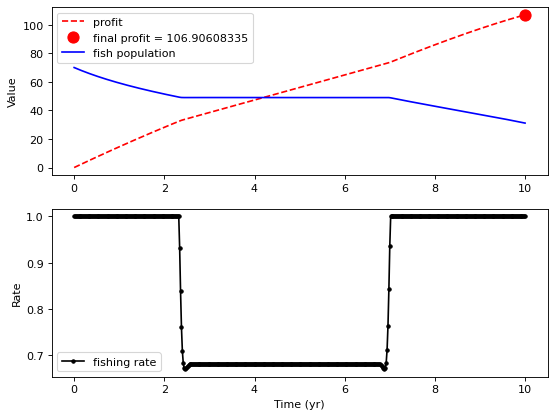

In [12]:
# plot results
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(2,1,1)
plt.plot(m.time,J.value,'r--',label='profit')
plt.plot(m.time[-1],Jf.value[0],'ro',markersize=10,
         label='final profit = '+str(Jf.value[0]))
plt.plot(m.time,x.value,'b-',label='fish population')
plt.ylabel('Value')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,y.value,'k.-',label='fishing rate')
plt.ylabel('Rate')
plt.xlabel('Time (yr)')
plt.legend()
plt.show()
